In [88]:
# 引入 pandas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as ss

# 设定中文字体
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 设定图像尺寸 与分辨率
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

# 将成绩统一到 [0，] 区间
MAX_SCORE = 100
MIN_SCORE = 0

data_file = 'Data/data.xlsx'
res_file = 'Data/res-'+str(MAX_SCORE-MIN_SCORE)+'.xlsx'


正在进行 1/23， 表名：河南文科


正在进行 2/23， 表名：河南理科


正在进行 3/23， 表名：北京


正在进行 4/23， 表名：上海


正在进行 5/23， 表名：河北文科


正在进行 6/23， 表名：河北理科


正在进行 7/23， 表名：山东


正在进行 8/23， 表名：广东文科


正在进行 9/23， 表名：广东理科


正在进行 10/23， 表名：湖北文科


正在进行 11/23， 表名：湖北理科


正在进行 12/23， 表名：湖南文科


正在进行 13/23， 表名：湖南理科


正在进行 14/23， 表名：四川文科


正在进行 15/23， 表名：四川理科


正在进行 16/23， 表名：安徽文科


正在进行 17/23， 表名：安徽理科


正在进行 18/23， 表名：广西文科


正在进行 19/23， 表名：广西理科


正在进行 20/23， 表名：贵州文科


正在进行 21/23， 表名：贵州理科


正在进行 22/23， 表名：江西文科


正在进行 23/23， 表名：江西理科
已经完成，存储文件：Data/res-100.xlsx


In [89]:

# 读取excel , 获取所有表单名字
excel_info = pd.ExcelFile(data_file)

all_data = {}
all_data_ratio = {}
# 获取表中的每一个数据文件 并将数据归一化到 0-500
for index in range(len(excel_info.sheet_names)):
    # 读取每一个表单
    cur_sheetname = excel_info.sheet_names[index]
    df_sheet = pd.read_excel(data_file,sheet_name=cur_sheetname)

    # 获取每一个表中的 总分数 和对应分数的人数
    scores = df_sheet[df_sheet.columns.values[0]]
    nums = df_sheet[df_sheet.columns.values[1]]

    # 数据 对应 每个分数的人数 表
    ROWS = MAX_SCORE-MIN_SCORE+1
    trans_scores_nums = [0] * ROWS

    rows = len(scores)
    cur_max_score = scores[0]
    cur_min_score = scores[rows - 1]

    cur_index = 0;
    for s in scores:
                
        # 计算 变换之后的分数 四舍五入
        trans_score = (int)(round((s - cur_min_score)/(cur_max_score-cur_min_score) * (MAX_SCORE- MIN_SCORE)))

        # 在计算分数的位置上 加上对应分数的人数
        trans_scores_nums[trans_score-1] += nums[cur_index];
        cur_index += 1
        
    # 数据稍微处理一下， 做简单的平滑处理, 去除最低分数据
    except0data = [0] * (ROWS-1)
    for i in range(ROWS-1):
        except0data[i] = trans_scores_nums[i+1];
        
    # 中值滤波去除噪点
    smooth_trans = ss.medfilt(except0data,7)
    
     # 将数据转换成比例， 更具有一般性
    sum = 0
    smooth_trans_ratio = [0]*(ROWS-1)
    for i in range(ROWS -1):
        sum += smooth_trans[i]
    
    for i in range(ROWS -1):
        smooth_trans_ratio[i] = smooth_trans[i]/sum
    
    all_data[cur_sheetname] = smooth_trans
    all_data_ratio[cur_sheetname] = smooth_trans_ratio
    
    print('正在进行 {0}/{1}， 表名：{2}'.format(index+1,len(excel_info.sheet_names),cur_sheetname))
    
    # plt.plot(smooth_trans2)
# write_data = pd.DataFrame(all_data)
# write_data.to_excel(res_file,sheet_name='res')
write_data_ratio = pd.DataFrame(all_data_ratio)
write_data_ratio.to_excel(res_file,sheet_name='ratio')

print('已经完成，存储文件：{0}'.format(res_file))


正在进行 1/23， 表名：河南文科


正在进行 2/23， 表名：河南理科


正在进行 3/23， 表名：北京


正在进行 4/23， 表名：上海


正在进行 5/23， 表名：河北文科


正在进行 6/23， 表名：河北理科


正在进行 7/23， 表名：山东


正在进行 8/23， 表名：广东文科


正在进行 9/23， 表名：广东理科


正在进行 10/23， 表名：湖北文科


正在进行 11/23， 表名：湖北理科


正在进行 12/23， 表名：湖南文科


正在进行 13/23， 表名：湖南理科


正在进行 14/23， 表名：四川文科


正在进行 15/23， 表名：四川理科


正在进行 16/23， 表名：安徽文科


正在进行 17/23， 表名：安徽理科


正在进行 18/23， 表名：广西文科


正在进行 19/23， 表名：广西理科


正在进行 20/23， 表名：贵州文科


正在进行 21/23， 表名：贵州理科


正在进行 22/23， 表名：江西文科


正在进行 23/23， 表名：江西理科
已经完成，存储文件：Data/res-100.xlsx


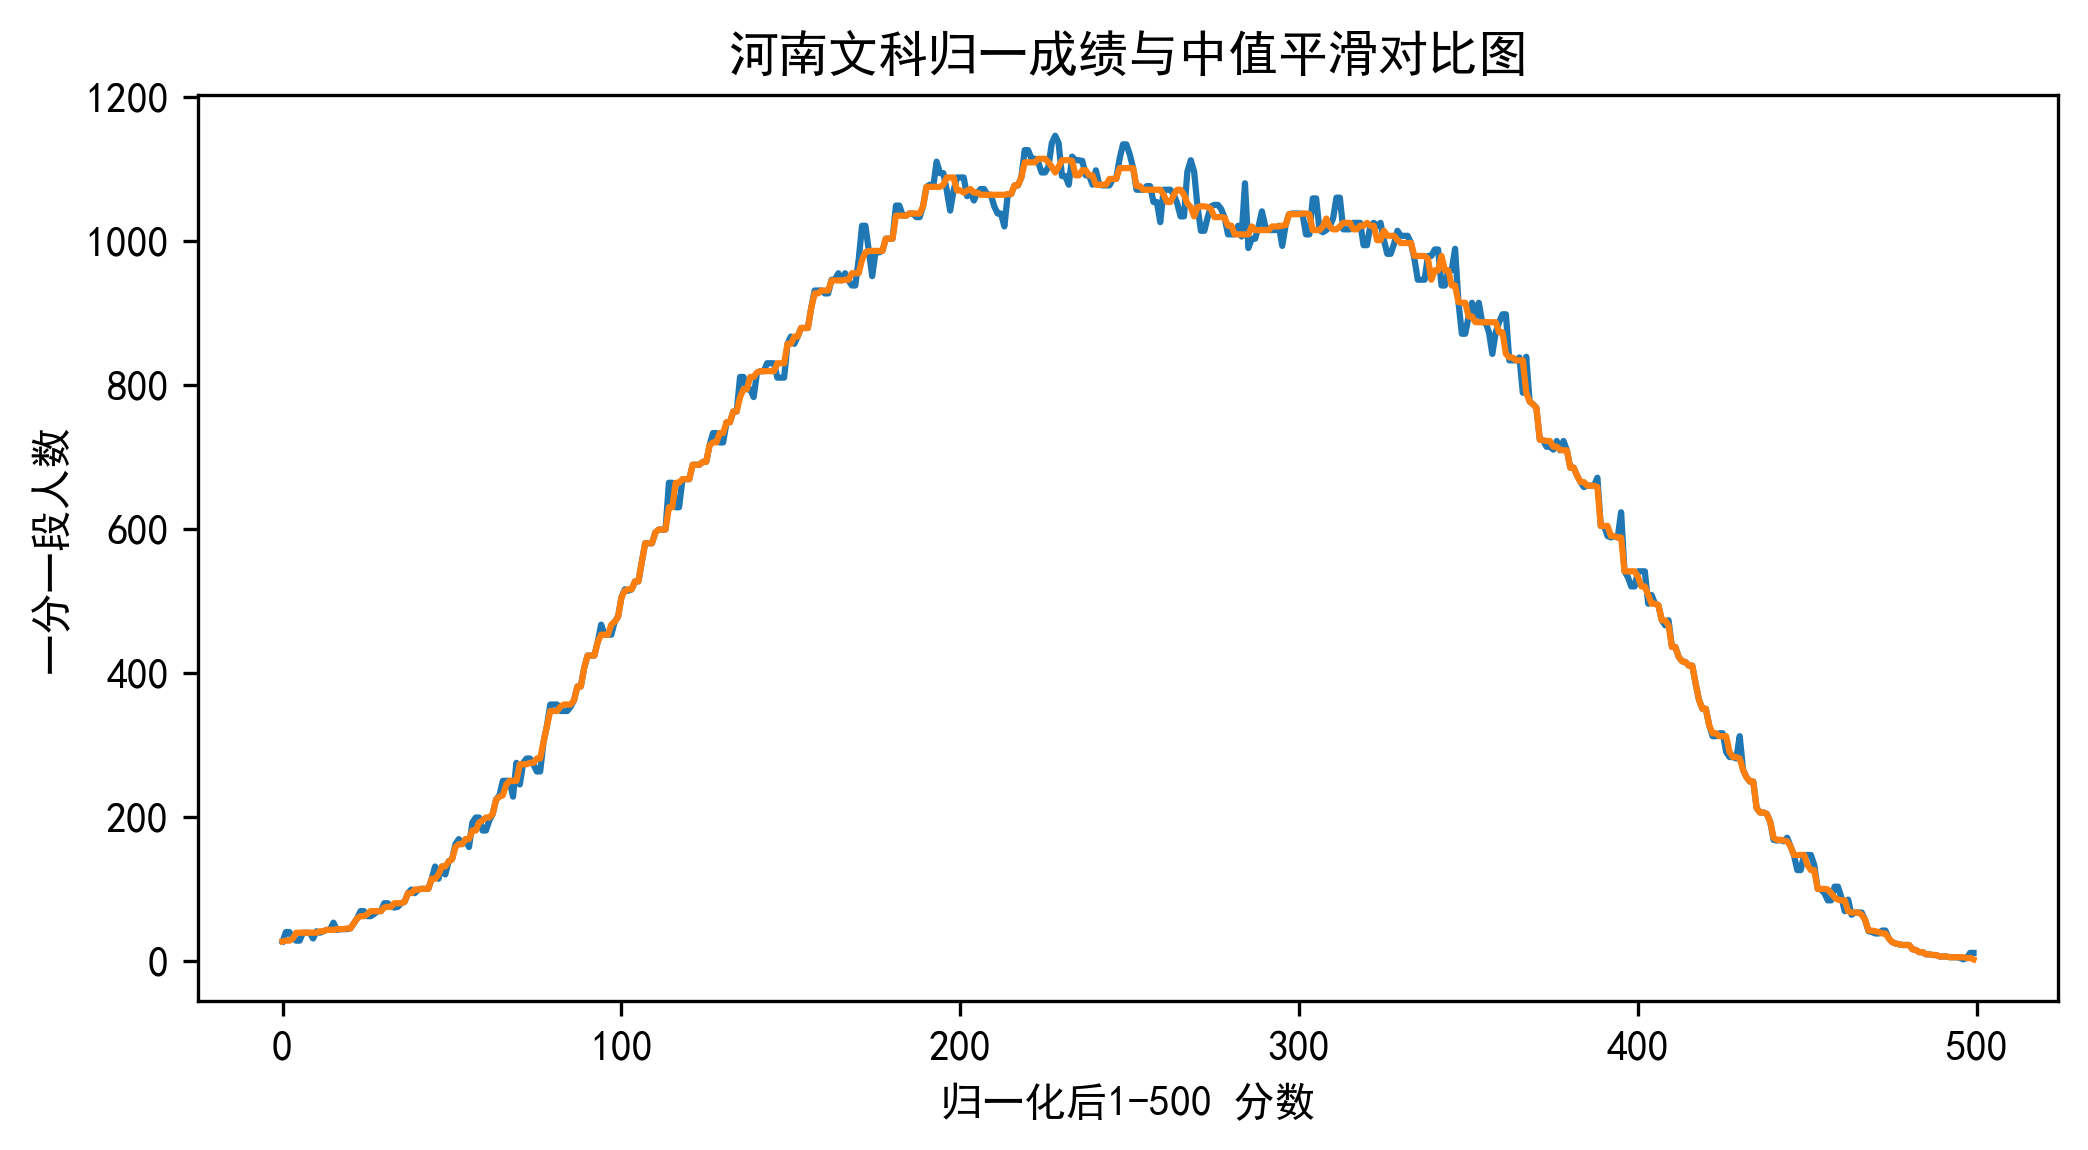

In [83]:
data = all_data['河南文科']

plt.plot(data)
new_data = ss.medfilt(data,9);
plt.title('河南文科归一成绩与中值平滑对比图')
plt.xlabel('归一化后1-500 分数')
plt.ylabel('一分一段人数')
plt.plot(new_data)
plt.savefig('滤波对比.png')

In [86]:
str(500)


'500'